## Drsanje na CartPole

> **Problem**: Če želi Peter pobegniti volku, se mora premikati hitreje od njega. Videli bomo, kako se Peter lahko nauči drsati, predvsem pa ohranjati ravnotežje, z uporabo Q-Learninga.

Najprej namestimo knjižnico gym in uvozimo potrebne knjižnice:


In [1]:
#code block 1

## Ustvari okolje cartpole


In [ ]:
#code block 2

Da vidimo, kako deluje okolje, izvedimo kratko simulacijo za 100 korakov.


In [ ]:
#code block 3

Med simulacijo moramo pridobiti opazovanja, da se lahko odločimo, kako ukrepati. Pravzaprav nam funkcija `step` vrne trenutna opazovanja, funkcijo nagrajevanja in zastavico `done`, ki označuje, ali ima smisel nadaljevati simulacijo ali ne:


In [ ]:
#code block 4

Lahko dobimo najmanjšo in največjo vrednost teh števil:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Raziskujmo tudi druge metode diskretizacije z uporabo binov:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Zdaj izvedimo kratko simulacijo in opazujmo te diskretne vrednosti okolja.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## Struktura Q-tabele


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


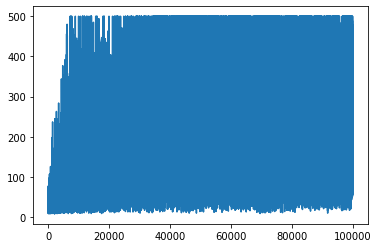

In [20]:
plt.plot(rewards)

Iz tega grafa ni mogoče ničesar razbrati, saj se zaradi narave stohastičnega procesa učenja dolžina učnih sej močno razlikuje. Da bi ta graf imel več smisla, lahko izračunamo **tekoče povprečje** preko serije poskusov, recimo 100. To lahko priročno izvedemo z uporabo `np.convolve`:


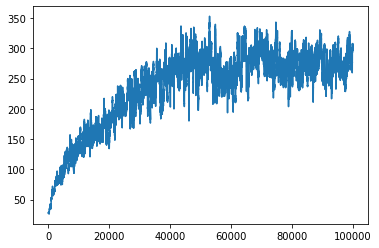

In [22]:
#code block 12

## Spreminjanje hiperparametrov in opazovanje rezultatov v praksi

Zdaj bi bilo zanimivo dejansko videti, kako se obnaša trenirani model. Zaženimo simulacijo in sledili bomo isti strategiji izbire akcij kot med treningom: vzorčenje glede na porazdelitev verjetnosti v Q-tabeli:


In [23]:
# code block 13

## Shranjevanje rezultata v animiran GIF

Če želite navdušiti svoje prijatelje, jim lahko pošljete animiran GIF slike ravnotežne palice. Za to lahko uporabimo `env.render` za ustvarjanje slikovnega okvirja in nato te okvirje shranimo v animiran GIF z uporabo knjižnice PIL:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Omejitev odgovornosti**:  
Ta dokument je bil preveden z uporabo storitve AI za prevajanje [Co-op Translator](https://github.com/Azure/co-op-translator). Čeprav si prizadevamo za natančnost, vas prosimo, da upoštevate, da lahko avtomatizirani prevodi vsebujejo napake ali netočnosti. Izvirni dokument v njegovem izvirnem jeziku je treba obravnavati kot avtoritativni vir. Za ključne informacije priporočamo profesionalni človeški prevod. Ne prevzemamo odgovornosti za morebitna napačna razumevanja ali napačne interpretacije, ki bi nastale zaradi uporabe tega prevoda.
